In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob
import re
import yaml
import torch
import json

In [2]:
def find_params(data, cond):
    for d in data:
        found = True
        for k, v in cond.items():
            if d["args"][k] != v:
                found = False
        if found:
            return d
    return None

def find_all_params(data, cond):
    all_d = []
    for d in data:
        found = True
        for k, v in cond.items():
            if d["args"][k] != v:
                found = False
        if found:
            all_d.append(d)
    return all_d

In [3]:
def load_data(root):
    data = []
    total = 0
    folders = sorted(glob.glob(os.path.join(root, "*")))
    last_prefix = None

    for folder in folders:
        path, folder_name = os.path.split(folder)
        prefix, job_id = folder_name.split("_")
        if prefix == last_prefix:
            continue

        args = yaml.load(open(os.path.join(folder, "config.yaml"), "r"))
        filename = os.path.join(folder, "stats.pickle")
        if os.path.exists(filename):
            print(f"{len(data)}: {folder}")
            stats = torch.load(filename)
            data.append(dict(args=args,stats=stats))
            last_prefix = prefix
            
    return data

In [5]:
# python two_layer_new2.py -m multi=1,2,5,10 d=10 m=5 teacher_strength_decay=0,1 lr=0.01 use_sgd=true N_train=30,45,60 num_epoch=20 num_iter_per_epoch=5000 batchsize=8 theory_suggest_train=true theory_suggest_sigma=0.5,1,2 theory_suggest_mean=0,1,2 hydra/launcher=fairtask githash=`githash`
root = "/checkpoint/yuandong/outputs/2019-09-15/13-42-38/"

# python two_layer_new2.py -m multi=1,2,5,10 d=100 m=5 teacher_strength_decay=1 lr=0.01 use_sgd=true N_train=210,270,330,390,450,510,570,630,690,720,780,840,900,960 num_epoch=20 num_iter_per_epoch=5000 batchsize=16 theory_suggest_train=false hydra/launcher=fairtask githash=`githash`
root_random_data = "/checkpoint/yuandong/outputs/2019-09-18/09-58-13"

# python two_layer_new2.py -m multi=1,2,5,10 d=100 m=5 teacher_strength_decay=1 lr=0.01 use_sgd=true N_train=210,270,330,390,450,510,570,630,690,720,780,840,900,960 num_epoch=20 num_iter_per_epoch=5000 batchsize=16 theory_suggest_train=true theory_suggest_sigma=2 theory_suggest_mean=2 hydra/launcher=fairtask githash=`githash`
root_suggest_data = "/checkpoint/yuandong/outputs/2019-09-18/13-16-37"

# python two_layer_new2.py -m multi=1,2,5,10 d=100 m=5 teacher_strength_decay=1 lr=0.01 use_sgd=true N_train=30,45,60,75,90,105,120,135,150,165,180,195 num_epoch=20 num_iter_per_epoch=5000 batchsize=16 theory_suggest_train=false hydra/launcher=fairtask githash=`githash`
root_random_data2 = "/checkpoint/yuandong/outputs/2019-09-22/16-36-34"

# python two_layer_new2.py -m multi=1,2,5,10 d=100 m=5 teacher_strength_decay=1 lr=0.01 use_sgd=true N_train=30,45,60,75,90,105,120,135,150,165,180,195 num_epoch=20 num_iter_per_epoch=5000 batchsize=16 theory_suggest_train=true theory_suggest_sigma=2 theory_suggest_mean=2 hydra/launcher=fairtask githash=`githash`
root_suggest_data2 = "/checkpoint/yuandong/outputs/2019-09-22/16-39-20"

data_suggest = load_data(root_suggest_data)
data_suggest += load_data(root_suggest_data2)

data_random = load_data(root_random_data)
data_random += load_data(root_random_data2)

0: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/0_17823333
1: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/10_17823364
2: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/11_17823357
3: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/12_17823320
4: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/13_17823307
5: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/14_17823341
6: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/15_17823351
7: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/16_17823353
8: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/17_17823345
9: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/18_17823343
10: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/19_17823324
11: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/1_17823310
12: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/20_17823316
13: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/21_17823334
14: /checkpoint/yuandong/outputs/2019-09-18/13-16-37/22_17823362
15: /checkpoint/yuandong/outputs/2019

23: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/30_17816250
24: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/31_17816252
25: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/32_17816251
26: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/33_17816260
27: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/34_17816225
28: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/35_17816278
29: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/36_17816237
30: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/37_17816246
31: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/38_17816249
32: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/39_17816265
33: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/3_17816244
34: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/40_17816259
35: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/41_17816262
36: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/42_17816224
37: /checkpoint/yuandong/outputs/2019-09-18/09-58-13/43_17816227
38: /checkpoint/yuandong/o

In [69]:
# python two_layer_new2.py -m multi=1,2,5,10 d=10 m=5 teacher_strength_decay=0,1,2 lr=0.01 use_sgd=true N_train=30,45,60 num_epoch=20 num_iter_per_epoch=5000 batchsize=8 theory_suggest_train=false hydra/launcher=fairtask githash=`githash`

root2_random_data = "/checkpoint/yuandong/outputs/2019-09-15_08-47-24"
data2 = load_data(root2_random_data)

0: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/0_17713333
1: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/10_17713341
2: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/11_17713343
3: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/12_17713379
4: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/13_17713389
5: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/14_17713397
6: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/15_17713299
7: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/16_17713305
8: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/17_17713330
9: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/18_17713319
10: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/19_17713361
11: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/1_17713386
12: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/20_17713350
13: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/21_17713372
14: /checkpoint/yuandong/outputs/2019-09-15_08-47-24/22_17713392
15: /checkpoint/yuandong/outputs/2019

In [20]:
def plot_avg_loss(data, label):
    eval_loss = []
    eval_loss_std = []
    train_loss = []
    train_loss_std = []
    
    eval_corr = []
    eval_corr_std = []

    for n_train in N_trains:
        ds = find_all_params(data, dict(N_train=n_train))

        all_eval_loss = []
        all_train_loss = []
        all_eval_best_corr = []
        # print(len(ds))
        for d in ds:
            # Get minimal eval_loss
            all_eval_loss += [ min([ s["eval_loss"] for s in stats[1:] ]) for seed, stats in d["stats"].items() ]
            all_train_loss += [ min([ s["train_loss"] for s in stats[1:] ]) for seed, stats in d["stats"].items() ]
            all_eval_best_corr += [ min([ s["corr_eval"].max(dim=1)[0].mean(dim=0).item() for s in stats[1:] ]) for seed, stats in d["stats"].items() ]
                        
        v = torch.FloatTensor(all_eval_loss)
        eval_loss.append(v.mean().item())
        eval_loss_std.append(v.std().item())
        
        v = torch.FloatTensor(all_train_loss)
        train_loss.append(v.mean().item())
        train_loss_std.append(v.std().item())
        
        v = torch.FloatTensor(all_eval_best_corr)
        eval_corr.append(v.mean().item())
        eval_corr_std.append(v.std().item())

        
    eval_loss = np.array(eval_loss)
    train_loss = np.array(train_loss)
    eval_corr = np.array(eval_corr)

    p = plt.plot(N_trains, eval_loss, label="eval_" + label)
    plt.fill_between(N_trains, eval_loss - eval_loss_std, eval_loss + eval_loss_std, alpha=0.2)
    
    plt.plot(N_trains, train_loss, label="train_" + label, linestyle='--') # , color = p[0].get_color())
    plt.fill_between(N_trains, train_loss - train_loss_std, train_loss + train_loss_std, alpha=0.2)
    
    plt.plot(N_trains, eval_corr, label="corr_" + label, linestyle=':') # , color = p[0].get_color())
    plt.fill_between(N_trains, eval_corr - eval_corr_std, eval_corr + eval_corr_std, alpha=0.2)


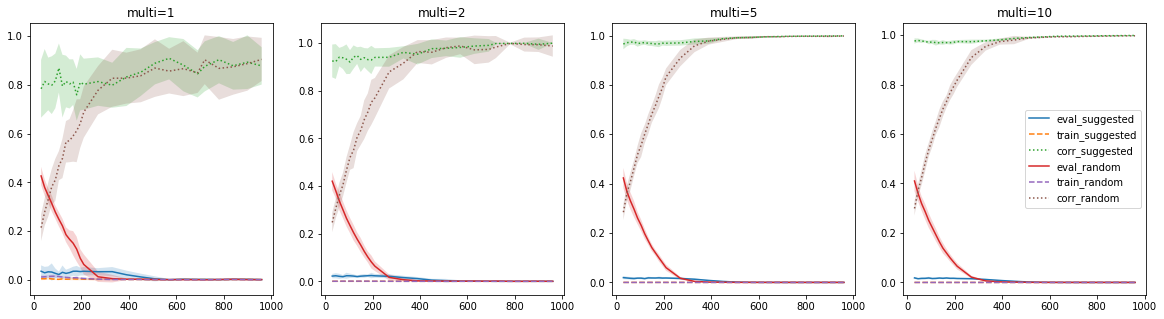

In [21]:
decay = 1
num_teacher = 5
theory_suggest_means = (0,1,2)
theory_suggest_sigmas = (0.5,1,2)

# N_trains = (30, 45, 60)
N_trains = (30,45,60,75,90,105,120,135,150,165,180,195,210,270,330,390,450,510,570,630,690,720,780,840,900,960)
multis = (1, 2, 5, 10)

plt.figure(figsize=(20, 5))

# multi=multi, 
for i, multi in enumerate(multis):
    plt.subplot(1, 4, i + 1)
    cond = dict(multi=multi, teacher_strength_decay=decay, m=num_teacher)
    data_suggest_sub = find_all_params(data_suggest, cond)
    data_random_sub = find_all_params(data_random, cond)

    plot_avg_loss(data_suggest_sub, label="suggested")    
    plot_avg_loss(data_random_sub, label="random")    
    plt.title(f"multi={multi}")

#counter = 1
#for theory_suggest_sigma in theory_suggest_sigmas:
#    label = f'sigma={theory_suggest_sigma}'
#    plot_avg_loss(find_all_params(data_sub, dict(theory_suggest_sigma=theory_suggest_sigma)), label=label)    
    
#label = "normal"
#plot_avg_loss(data2_sub, label=label)    
    
# plt.plot(multis, eval_loss)
# plt.fill_between(multis, np.array(eval_loss) - np.array(eval_loss_std), np.array(eval_loss) + np.array(eval_loss_std), alpha=0.2)

    
plt.legend()
plt.show()

#plt.xlabel('Max correlation to teachers')
#plt.ylabel('norm of fan-out weights')
#plt.title(f"{multi}x, loss={sum(losses) / len(losses):#.2f}")
#plt.axis([0.0, 1.1, -0.1, 3.5])

In [17]:
data_suggest[24]["stats"][1][4]["corr_eval"].size()

torch.Size([5, 25])

In [11]:
d